In [1]:
%pylab inline
import gromacs.formats
import sys
import itertools 
import mdtraj as md
import pandas as pd
import numpy as np
import seaborn
import matplotlib as plt
rc('font', family='serif', size=20)

Populating the interactive namespace from numpy and matplotlib
NOTE: Some configuration directories are not set up yet: 
	C:\Users\chh\.gromacswrapper
	C:\Users\chh\.gromacswrapper\qscripts
	C:\Users\chh\.gromacswrapper\templates
NOTE: You can create the configuration file and directories with:
	>>> import gromacs
	>>> gromacs.config.setup()


D:\anaconda\envs\pytorch\lib\site-packages\gromacs\__init__.py:288: GromacsImportWarning: Some Gromacs commands were NOT found; maybe source GMXRC first? The following are missing:
['release']

  category=GromacsImportWarning)


In [2]:
tiedname_1=['A1EAH8','A1EAI4','A4ZPW4','A8CVW4','B2YFQ5','B2YFU9','O89960','P04578','Q27Q69','Q2MKA8','Q4QXE8','Q5G5V4','Q5G5V8','Q6EG58','Q70014']
tiedname_2=['A1EAI0','A1EAI2','A1EAI7','A7KVY7','B0FBI6','B2YFT0','Q202K1','Q202K7','Q27Q74','Q5G5U5','Q5G5U7','Q5G5V1','Q5G5V5','Q6TCV7','Q8JDI3']
tiedname_3=['A0MTL0','A1EAG8','A1EAH3','A1EAH6','A1EAH7','A4ZPW7','A4ZPW8','A4ZPX1','B2YFP1','B2YFP6','B2YFS0','B2YFU4','B2YFV4','Q5G5U6','Q5G5V2']
closed_data_path='D:/Lab/data/gp120/5roles/data/trajs_5fyj/'

In [3]:
liganded_ca_file=tiedname_2
t='2'
# rmsd
# liganded_ca= [gromacs.formats.XVG(closed_data_path+t+'/'+f+'/rmsd.xvg').array[1] for f in liganded_ca_file ]
liganded_ca= [md.load_xtc(closed_data_path+t+'/'+f+'/pro.xtc',top=md.load(closed_data_path+t+'/'+f+'/'+f+'_5fyk.pdb')) for f in liganded_ca_file ]
#rg
liganded_cb= [md.load_xtc(closed_data_path+t+'/'+f+'/pro.xtc',top=md.load(closed_data_path+t+'/'+f+'/'+f+'_5fyk.pdb')) for f in liganded_ca_file ]

In [4]:
a_top=[md.load(closed_data_path+t+'/'+f+'/'+f+'_5fyk.pdb')for f in liganded_ca_file]#x rmsd
b_top=[md.load(closed_data_path+t+'/'+f+'/'+f+'_5fyk.pdb')for f in liganded_ca_file]#y rg

In [5]:
overlist=[]#x
overlist_b=[]#y
for traj,aa_top,rg,bb_top in zip(liganded_ca,a_top,liganded_cb,b_top):
    liganded_rmsd = md.rmsd(target=traj, reference=aa_top)
#     liganded_rmsd = md.rmsd(target=md.load_xtc(closed_data_path+t+'/'+f+'/pro.xtc',top=md.load(closed_data_path+t+'/'+f+'/'+f+'_5fyk.pdb')), reference=aa_top)
    unbound_rg = md.compute_rg(rg)
    overlist.extend(liganded_rmsd)
    overlist_b.extend(unbound_rg)
print(len(overlist),len(overlist_b))

45015 45015


45015 45015


D:\anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


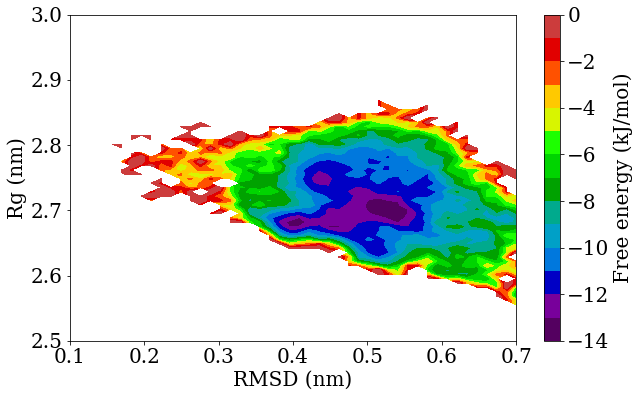

In [6]:
figure(figsize(10,6))
overlist_b=np.array(overlist_b)
overlist=np.array(overlist)
z,x,y = np.histogram2d(overlist,overlist_b, bins=50)
print(len(overlist),len(overlist_b))

F = -2.5*np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]

levels = [i for i in range(-14,0,1)]+[0]
contourf(F.T, 15, cmap=cm.get_cmap("nipy_spectral"),levels=levels,extent=extent)

clb = colorbar()
clb.set_label('Free energy (kJ/mol)')
xlabel('RMSD (nm)')
ylabel('Rg (nm)')
xticks(arange(0.1,0.8,0.1))
xlim(0.1,0.7)
yticks(arange(2.5,3.1,0.1))
ylim(2.5,3.0)
savefig('roles_free_energy_2.png',format='png',dpi=600,bbox_inches='tight')

45015 45015
45015 45015


D:\anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


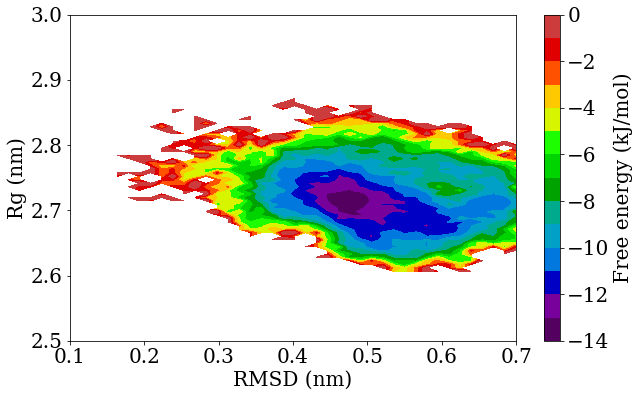

In [7]:
liganded_ca_file=tiedname_3
t='3'
# rmsd
liganded_ca= [md.load_xtc(closed_data_path+t+'/'+f+'/pro.xtc',top=md.load(closed_data_path+t+'/'+f+'/'+f+'_5fyk.pdb')) for f in liganded_ca_file ]
#rg
liganded_cb= [md.load_xtc(closed_data_path+t+'/'+f+'/pro.xtc',top=md.load(closed_data_path+t+'/'+f+'/'+f+'_5fyk.pdb')) for f in liganded_ca_file ]
a_top=[md.load(closed_data_path+t+'/'+f+'/'+f+'_5fyk.pdb')for f in liganded_ca_file]#x rmsd
b_top=[md.load(closed_data_path+t+'/'+f+'/'+f+'_5fyk.pdb')for f in liganded_ca_file]#y rg
overlist=[]#x
overlist_b=[]#y
for traj,aa_top,rg,bb_top in zip(liganded_ca,a_top,liganded_cb,b_top):
    liganded_rmsd = md.rmsd(target=traj, reference=aa_top)
    unbound_rg = md.compute_rg(rg)
    overlist.extend(liganded_rmsd)
    overlist_b.extend(unbound_rg)
print(len(overlist),len(overlist_b))

figure(figsize(10,6))
overlist_b=np.array(overlist_b)
overlist=np.array(overlist)
z,x,y = np.histogram2d(overlist,overlist_b, bins=50)
print(len(overlist),len(overlist_b))

F = -2.5*np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]

levels = [i for i in range(-14,0,1)]+[0]
contourf(F.T, 15, cmap=cm.get_cmap("nipy_spectral"),levels=levels,extent=extent)

clb = colorbar()
clb.set_label('Free energy (kJ/mol)')
xlabel('RMSD (nm)')
ylabel('Rg (nm)')
xticks(arange(0.1,0.8,0.1))
xlim(0.1,0.7)
yticks(arange(2.5,3.1,0.1))
ylim(2.5,3.0)
savefig('roles_free_energy_3.png',format='png',dpi=600,bbox_inches='tight')

45015 45015


D:\anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


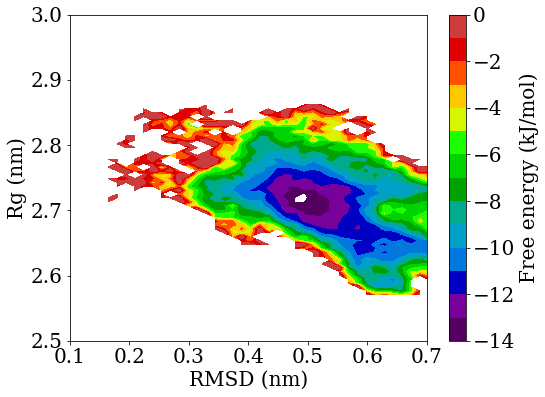

In [42]:
figure(figsize(8,6))
overlist_b=np.array(overlist_b)
overlist=np.array(overlist)
z,x,y = np.histogram2d(overlist,overlist_b, bins=50)
print(len(overlist),len(overlist_b))

F = -2.5*np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]
levels = [i for i in range(-14,0,1)]+[0]
contourf(F.T, 15, cmap=cm.get_cmap("nipy_spectral"),levels=levels,extent=extent)
clb = colorbar()
clb.set_label('Free energy (kJ/mol)')
xlabel('RMSD (nm)')
ylabel('Rg (nm)')
xticks(arange(0.1,0.8,0.1))
xlim(0.1,0.7)
yticks(arange(2.5,3.1,0.1))
ylim(2.5,3.0)
savefig('roles_free_energy_1_1.png',format='png',dpi=600,bbox_inches='tight')

30010 30010


/home/dldx/miniconda3/envs/md/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


([<matplotlib.axis.YTick at 0x7f5b8f2ec150>,
 <a list of 5 Text major ticklabel objects>)

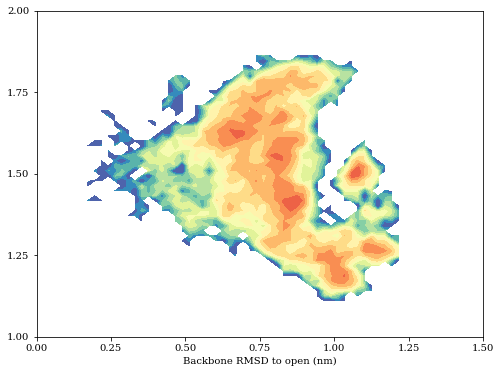

In [101]:
figure(figsize(8,6))
overlist_b=np.array(overlist_b)
overlist=np.array(overlist)
z,x,y = np.histogram2d(overlist,overlist_b, bins=50)
print(len(overlist),len(overlist_b))

F = -2.5*np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]

levels = [i for i in range(-14,0,1)]+[0]
contourf(F.T, 15, cmap=cm.get_cmap("Spectral"),levels=levels,extent=extent)

#clb = colorbar()
clb.set_label('Free energy (kJ/mol)')
xlabel('Backbone RMSD to open (nm)')
#ylabel('Backbone RMSD to closed (nm)')
xticks(arange(0.0,1.6,0.25))
xlim(0,1.5)

yticks([])
yticks(arange(1.0,2.1,0.25))
#ylim(1.0,2.0)
#savefig('free_energy_22.png',format='png',dpi=600,bbox_inches='tight')

In [ ]:
figure(figsize(10,6))
overlist_b=np.array(overlist_b)
overlist=np.array(overlist)
z,x,y = np.histogram2d(overlist,overlist_b, bins=50)
print(len(overlist),len(overlist_b))

F = -2.5*np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]

levels = [i for i in range(-14,0,1)]+[0]
contourf(F.T, 15, cmap=cm.get_cmap("Spectral"),levels=levels,extent=extent)

clb = colorbar()
clb.set_label('Free energy (kJ/mol)')
xlabel('Backbone RMSD to open (nm)')
#ylabel('Backbone RMSD to closed (nm)')
xticks(arange(0.0,1.6,0.25))
xlim(0,1.5)

yticks([])
#yticks(arange(1.0,2.1,0.25))
ylim(1.0,2.0)
savefig('free_energy_33.png',format='png',dpi=600,bbox_inches='tight')

In [ ]:
name_list=tiedname_2
tier='2'
a_top=[md.load(open_data_path+tier+'/'+f+'/'+f+'_3j70.pdb')for f in name_list]
b_top=[md.load(closed_data_path+tier+'/'+f+'/'+f+'_5fyk.pdb')for f in name_list]

In [ ]:
f='Q5G5U5'
liganded_t= md.load_xtc(open_data_path+tier+'/'+f+'/strange_pro.xtc',top=md.load(open_data_path+tier+'/'+f+'/'+f+'_3j70.pdb'))

In [ ]:
# tier='3'
# tied_name_list=tiedname_3
# overlist=[]
# overlist_b=[]
# for name in tied_name_list:
#     rmsd_closed=gromacs.formats.XVG(closed_data_path+tier+'/'+name+'/rmsd.xvg').array[1]
#     rmsd_open=gromacs.formats.XVG(open_data_path+tier+'/'+name+'/rmsd.xvg').array[1]
#     overlist.extend(rmsd_open)
#     overlist_b.extend(rmsd_closed)

In [ ]:
liganded_ca= [md.load_xtc(open_data_path+tier+'/'+f+'/pro.xtc',top=md.load(open_data_path+tier+'/'+f+'/'+f+'_3j70.pdb')) for f in name_list ]
liganded_cb= [md.load_xtc(closed_data_path+tier+'/'+f+'/pro.xtc',top=md.load(closed_data_path+tier+'/'+f+'/'+f+'_5fyk.pdb')) for f in name_list ]
#print(liganded_ca)


In [ ]:
figure(figsize(8,5))
overlist_b=np.array(overlist_b)
overlist=np.array(overlist)
z,x,y = np.histogram2d(overlist,overlist_b, bins=50)
print(len(overlist))
print(len(overlist_b))
F = -2.5*np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]

levels = [i for i in range(-14,0,1)]+[0]
contourf(F.T, 15, cmap=cm.get_cmap("Spectral"),levels=levels,extent=extent)

clb = colorbar()
clb.set_label('Free energy (kJ/mol)')
xlabel('RMSD to open (nm)')
ylabel('RMSD to closed (nm)')
xticks(arange(0.0,2.0,0.2))
xlim(0,2.0)
yticks(arange(0.0,2.1,0.2))
ylim(0,2.0)
#savefig('free_energy.png',format='png',dpi=600,bbox_inches='tight')